In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
file = '../Analysis/NCVS_dirty.csv'

In [5]:
df = pd.read_csv(file)

In [6]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
0,1993,2418.22376,1,1,2,1,2,1,5,NaN,...,2,2,0,2,5,3,0,0.0,2.0,4
1,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
2,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
3,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
4,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,1,3,1,3,1,1,1.0,2.0,3


In [7]:
df = df[df.year != 1993]
df = df[df.year != 1994]
df = df[df.year != 1995]

In [8]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
12974,1996,3451.43740,1,1,2,1,5,2,4,0.0,...,1,2,0,1,4,2,0,0.0,2.0,5
12975,1996,2377.30718,2,1,2,1,6,2,4,0.0,...,2,2,0,1,4,2,0,0.0,2.0,2
12976,1996,2687.23144,1,1,2,1,5,2,4,1.0,...,1,3,5,1,4,2,0,0.0,2.0,3
12977,1996,2555.83758,2,1,2,1,5,2,6,2.0,...,2,2,0,1,4,2,0,0.0,2.0,3
12978,1996,3017.36110,1,1,2,1,5,1,3,1.0,...,2,2,0,1,4,2,0,0.0,2.0,3


In [9]:
# Define dictionaries for replacing all of the variables
rep_ager = {1 : "12 to 14",
            2 : "15 to 17",
            3 : "18 to 20",
            4 : "21 to 24",
            5 : "25 to 34",
            6 : "35 to 49",
            7 : "50 to 64",
            8 : "65 or older"}

rep_newcrime = {1 : "Violent victimization",
                2 : "Personal theft/larceny"}

rep_hispanic = {1 : "Hispanic",
                2 : "Non-Hispanic"}

rep_hincome = {1 : "Less than $7,500",
               2 : "$7,500 to $14,999",
               3 : "$15,000 to $24,999",
               4 : "$25,000 to $34,999",
               5 : "$35,000 to $49,999",
               6 : "$50,000 to $74,999",
               7 : "$75,000 or more",
               88 : "Unknown"}

rep_injury = {0 : "Not Injured",
              1 : "Injured"}

rep_locationr = {1 : "At or near victim's home",
                 2 : "At or near friend, neighbor, or relative's home",
                 3 : "Commercial place, parking lot, or other public area",
                 4 : "School",
                 5 : "Other location"}

rep_msa = {1 : "Principal city within MSA",
           2 : "Not part of principal city within MSA",
           3 : "Outside MSA"}

rep_marital2 = {1 : "Never Married",
                2 : "Married",
                3 : "Widowed",
                4 : "Divorced",
                5 : "Separated"}

rep_treatment = {0 : "Not injured",
                 1 : "Not treated for injury",
                 2 : "Treated at scene, home, medical office, or other location"}

rep_popsize = {0 : "Not a place",
               1 : "Under 100,000",
               2 : "100,000 to 249,999",
               3 : "250,000 to 499,999",
               4 : "500,000 to 999,999",
               5 : "1 million or more"}

rep_weapon = {1 : "Yes, offender had weapon",
              2 : "No, offender did not have weapon",
              3 : "Do not know if offender had weapon"}

rep_race1r = {1 : "White",
              2 : "Black",
              3 : "Other"}

rep_ethnic1r = {1 : "Non-Hispanic white",
                2 : "Non-Hispanic black",
                3 : "Non-Hispanic other",
                4 : "Hispanic"}

rep_region = {1 : "Northeast",
              2 : "Midwest",
              3 : "South",
              4 : "West"}

rep_notify = {1 : "Yes, reported to the police",
              2 : "No, did not report to the police",
              3 : "Do not know"}

rep_gender = {1 : "Male",
              2 : "Female"}

rep_newoff = {1 : "Rape/sexual assault",
              2 : "Robbery",
              3 : "Aggravated assault",
              4 : "Simple assault",
              5 : "Personal theft"}

rep_vicservices = {1 : "Services received from victim service agencies",
                   2 : "No services received from victim service agencies"}

rep_direl = {1 : "Intimates",
             2 : "Other relatives",
             3 : "Well-known/casual acquaintances",
             4 : "Stranger",
             5 : "Do not know relationship",
             6 : "Do not know number of offenders"}

rep_seriousviolent = {1 : "Violent crime excluding simple assault",
                      2 : "Simple assault",
                      3 : "Personal theft",
                      4 : "Property crime"}

rep_weapcat = {0 : "No weapon",
               1 : "Firearm",
               2 : "Knife",
               3 : "Other type weapon",
               4 : "Type weapon unknown",
               5 : "Do not know if offender had weapon"}

In [10]:
df["ager"].replace(rep_ager ,inplace = True)
df["newcrime"].replace(rep_newcrime ,inplace = True)
df["hispanic"].replace(rep_hispanic ,inplace = True)
df["hincome"].replace(rep_hincome ,inplace = True)
df["injury"].replace(rep_injury ,inplace = True)
df["locationr"].replace(rep_locationr ,inplace = True)
df["msa"].replace(rep_msa ,inplace = True)
df["marital2"].replace(rep_marital2 ,inplace = True)
df["treatment"].replace(rep_treatment ,inplace = True)
df["popsize"].replace(rep_popsize ,inplace = True)
df["weapon"].replace(rep_weapon ,inplace = True)
df["race1r"].replace(rep_race1r ,inplace = True)
df["ethnic1r"].replace(rep_ethnic1r ,inplace = True)
df["region"].replace(rep_region ,inplace = True)
df["notify"].replace(rep_notify ,inplace = True)
df["gender"].replace(rep_gender ,inplace = True)
df["newoff"].replace(rep_newoff ,inplace = True)
df["vicservices"].replace(rep_vicservices ,inplace = True)
df["direl"].replace(rep_direl ,inplace = True)
df["seriousviolent"].replace(rep_seriousviolent ,inplace = True)
df["weapcat"].replace(rep_weapcat ,inplace = True)

In [11]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
12974,1996,3451.43740,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999",Not a place,...,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,Other location
12975,1996,2377.30718,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"$25,000 to $34,999",Not a place,...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
12976,1996,2687.23144,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999","Under 100,000",...,"Yes, reported to the police",Do not know if offender had weapon,Do not know if offender had weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
12977,1996,2555.83758,Female,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$50,000 to $74,999","100,000 to 249,999",...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
12978,1996,3017.36110,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never Married,"$15,000 to $24,999","Under 100,000",...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."


In [11]:
#df.loc[df['notify'] == 8]

In [12]:
gender_vic = df.groupby('gender')
gender_group = gender_vic.count()
gender_group

,year,weight,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,region,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
gender,,,,,,,,,,,,,,,,,,,,,
Female,23034,23034,23034,23034,23034,23034,23034,23034,23034,23034,...,23034,23034,23034,23034,23034,23034,23034,23013,22792,23034
Male,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,...,24026,24026,24026,24026,24026,24026,24026,24005,23814,24026


In [13]:
labels = ["Male", "Female"]
gender_count = gender_group["year"].tolist()
gender_count

[23034, 24026]

<IPython.core.display.Javascript object>


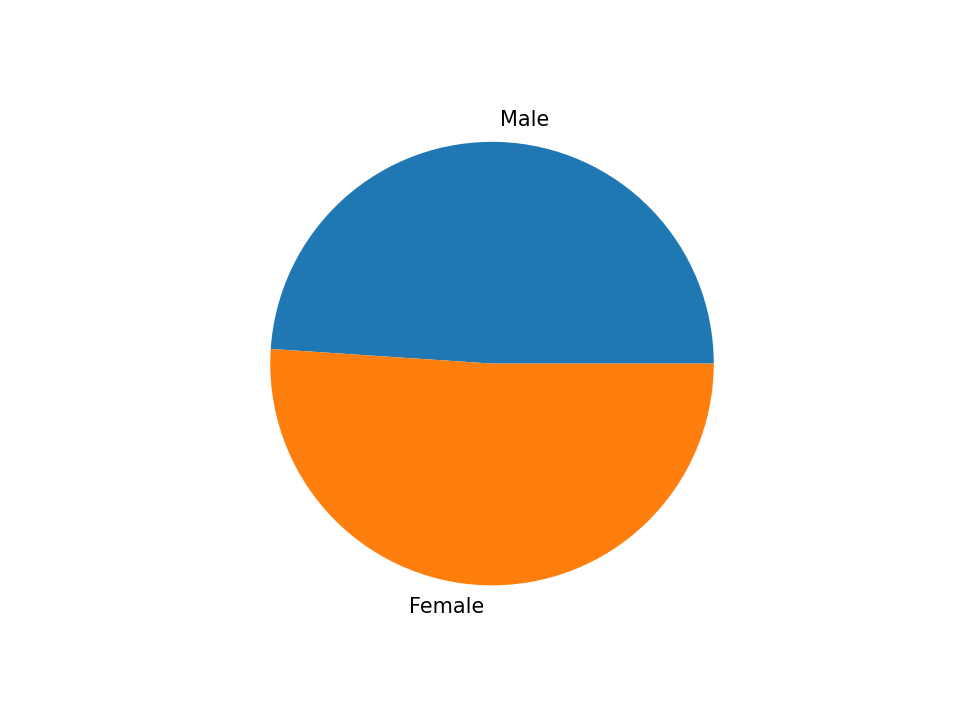

([<matplotlib.patches.Wedge at 0x1a7dfacbeb0>,
 [Text(0.03641607271329161, 1.099397048226045, 'Male'),
  Text(-0.03641617564627213, -1.0993970448165213, 'Female')])

In [14]:
plt.pie(gender_count, labels=labels)

In [20]:
race1r_vic = df.groupby('race1r')
race1r_group = race1r_vic.count()
race1r_groudp.f['DataFrame race1r'] = df['DataFrame race1r'].astype(float)

KeyError: 'DataFrame race1r'

In [17]:
plt.pie(race1r_vic.count, labels=labels)

TypeError: float() argument must be a string or a number, not 'method'

In [24]:
labels = ["White", "Black", "Other"]
race1r_count = race1r_group["year"].tolist()
race1r_count

[6129, 2829, 38102]

In [25]:
plt.show()

In [ ]:
gender_vic = df.groupby("gender")
gender_group = gender_vic.count()
gender_group

In [36]:
temp_df = df.groupby(df["gender"]).count().reset_index()
temp_df


# The colors of each section of the pie chart
colors = ["red", "orange"]

# # Tells matplotlib to seperate the "Humans" section from the others
# explode = (0.1, 0, 0, 0)

labels = ["Male", "Female"]

plt.pie(list(temp_df['gender']), labels=labels, colors = colors,
         shadow=True, startangle=140)

plt.pie()

ValueError: could not convert string to float: 'Female'

In [ ]:
# Pie Chart "Victim-Offender Relationship"
# From class activity
#pies = ["Apple", "Pumpkin", "Chocolate Creme", "Cherry", "Apple Crumb", "Pecan", "Lemon Meringue", "Blueberry", "Key Lime", "Peach"]
#pie_votes = [47,37,32,27,25,24,24,21,18,16]
#colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
#explode = (0.1,0,0,0,0,0,0,0,0,0)
v_o_relat_df = 

In [ ]:
# Pie Chart "Location"

In [29]:
# Pie Chart "Weapon category"
weapon_cat = ["No weapon", "Firearm", "Knife", "Other type weapon", "Type weapon unknown", "Do not know if offender had weapon"]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)


In [ ]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(_, explode=explode, labels=weapon_cat, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")
plt.show()

In [ ]:
# Pie Chart "Victim Services"

In [24]:
# Bar Chart "Location vs Years"
locations = ["At or near victim's home","At or near friend, neighbor, or relative's home" "Commercial place, parking lot, or other public area","Other location]
years = [8.6, 8.5, 8.3, 7.9, 7.2]
x_axis = np.arange(len(years))

# Create a bar chart based upon the above data
plt.bar(x_axis, bars_in_cities, color="b", align="center")


SyntaxError: EOL while scanning string literal (<ipython-input-24-1d6107d6dc9a>, line 2)

In [21]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cities)

NameError: name 'x_axis' is not defined

In [22]:
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

NameError: name 'x_axis' is not defined

In [27]:
plt.title("Location vs Years")
plt.xlabel("Years")
plt.ylabel("Location")

Text(0, 0.5, 'Location')

In [28]:
plt.show()

In [ ]:
# Bar Chart "Weight vs Years"
# Can be useful in comparision with stock market data trends in certain years

In [ ]:
# Bar Chart "Victimization Weight vs Age"


In [ ]:
# Bar Chart "Victimization Weight vs Income"

In [33]:
labels = ["White", "Black", "Other"]
race1r_df = race_group1["year"].tolist()
race_count1

NameError: name 'race_group1' is not defined

In [ ]:
plt.pie(gender_count1, labels = labels)